In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename = 'data.csv'
contant = pd.read_csv(filename,index_col='PassengerId')
contant.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
contant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
contant.describe()

C:\Users\gogog\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:

print ('总共有891人，存活下来有 {} 人'.format(sum(contant['Survived'])))

总共有891人，存活下来有 342 人


In [8]:
contant['Pclass'].groupby(contant['Pclass']).count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [9]:
print ('Pclass列有{}个变量值'.format(contant['Pclass'].unique()))
ep = pd.crosstab(contant['Embarked'],contant['Pclass'])
print (ep,'\n')
ep.plot

Pclass列有[3 1 2]个变量值
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353 



In [10]:
contant['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

Survived    0    1
Sex               
female     81  233
male      468  109 

Sex
female    0.742038
male      0.188908
dtype: float64


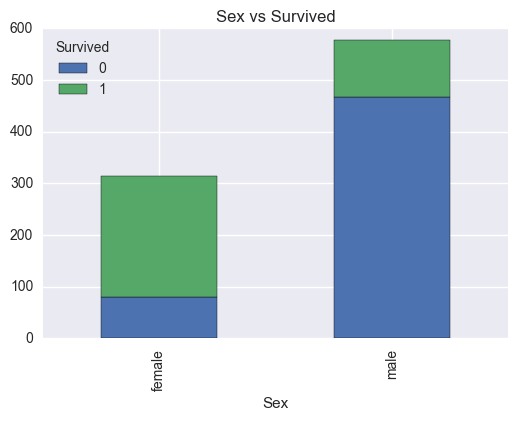

In [11]:
def cros(variable):
    cr = pd.crosstab(contant[variable],contant['Survived'])
    cr.plot(kind='bar',title=variable +' vs Survived',stacked=True)
    return cr
ss = cros('Sex')
print (ss,'\n')
print (ss[1]/ss.sum(1))

In [12]:

print (contant['Age'].describe(),'\n')
print ('总人口数:{}'.format(len(contant)))
print ('缺失值有{}个'.format(contant['Age'].isnull().sum()))

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64 

总人口数:891
缺失值有177个


C:\Users\gogog\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [14]:
contant['Age'] = contant['Age'].fillna(contant['Age'].median())
contant['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [15]:

def tranage(x):
    if x <= 6:
        return 'Child'
    if x <= 17:
        return 'Juvenile'
    if x <= 40:
        return 'Youth'
    if x <= 65:
        return 'Adult'
    else:
        return 'Elder'

Survived,0,1
Tranage,,
Adult,88,54
Child,14,33
Elder,7,1
Juvenile,38,28
Youth,402,226


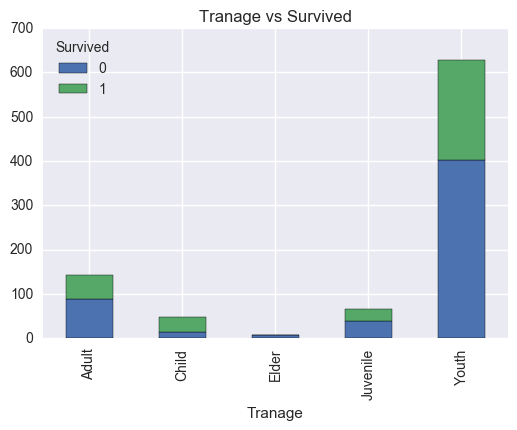

In [21]:
contant['Tranage'] = contant['Age'].apply(tranage)
ts = cros('Tranage')
ts

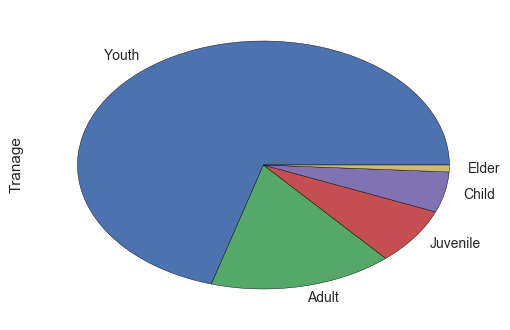

In [29]:
contant['Tranage'].value_counts().plot.pie()

In [17]:
ts[1]/ts.sum(1)

Tranage
Adult       0.380282
Child       0.702128
Elder       0.125000
Juvenile    0.424242
Youth       0.359873
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2D671FEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F2D6AC1AC8>]], dtype=object)

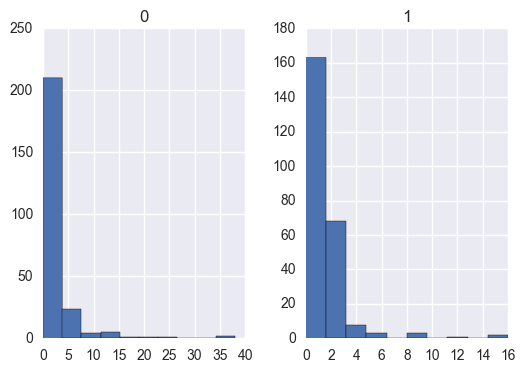

In [18]:

fs = pd.crosstab(contant['Fare'],contant['Survived'])
fs.hist()

In [19]:
contant['Old_or_Young'] = contant['Age'].apply(lambda x: 'old' if x > 40 else 'young' )

In [20]:
contant.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tranage,Old_or_Young
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Youth,young
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,young
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,young
